In [52]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA of Wikipedia Article "COVID-19 Pandemic Data"

In [2]:
url = "https://en.wikipedia.org/wiki/Coronavirus_disease_2019"
url2 = 'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data'

In [3]:
page = urllib.request.urlopen(url2)

In [4]:
soup = BeautifulSoup(page, "lxml")

In [5]:
table = soup.find("table",class_="wikitable")

In [6]:
cols = ['', 'Location', 'Cases', 'Deaths', 'Recovery', 'References']
df = pd.DataFrame(columns = cols)

In [7]:
df

,,Location,Cases,Deaths,Recovery,References


In [8]:

for items in table.find_all("tr")[:-1]:
    data = [''.join(item.text.split()) for item in items.find_all(['th','td'])]
    if(len(data) == 6):
        a_series = pd.Series(data, index = df.columns)
        df = df.append(a_series, ignore_index=True)

In [9]:
df.head()

,,Location,Cases,Deaths,Recovery,References
0,,World[e],"105,461,681","2,300,891","58,645,012",[2]
1,,UnitedStates[f],"27,054,709","463,090","11,166,500",[9]
2,,India,"10,802,591","154,823","10,496,308",[10]
3,,Brazil,"9,449,088","230,127","8,326,798",[11][12]
4,,Russia[g],"3,951,233","76,229","3,436,326",[13]


In [10]:
#The Cases, Deaths and Recovery Counts need to be cleaned into integers 

In [11]:
def makeint(num):
    
    if type(num) == int: 
        return num 
    new = num.replace(',', '')
    if new == 'Nodata': 
        return 0
    elif new == '60+':
        return 60
    return int(new)

In [12]:
df['Cases'] = df['Cases'].apply(makeint)

In [13]:
df['Deaths'] = df['Deaths'].apply(makeint)

In [14]:
df['Recovery'] = df['Recovery'].apply(makeint)

In [15]:
df

,,Location,Cases,Deaths,Recovery,References
0,,World[e],105461681,2300891,58645012,[2]
1,,UnitedStates[f],27054709,463090,11166500,[9]
2,,India,10802591,154823,10496308,[10]
3,,Brazil,9449088,230127,8326798,[11][12]
4,,Russia[g],3951233,76229,3436326,[13]
...,...,...,...,...,...,...
234,,AmericanSamoa,4,0,3,[346]
235,,Samoa,2,0,2,[347]
236,,FederatedStatesofMicronesia,1,0,1,[348]
237,,Vanuatu,1,0,1,[349]


In [33]:
df['Percent Death Rate'] = (df['Deaths'] / df['Cases']) * 100
df

,,Location,Cases,Deaths,Recovery,References,Rate,Percent Death Rate
0,,World[e],105461681,2300891,58645012,[2],2.181732,2.181732
1,,UnitedStates[f],27054709,463090,11166500,[9],1.711680,1.711680
2,,India,10802591,154823,10496308,[10],1.433202,1.433202
3,,Brazil,9449088,230127,8326798,[11][12],2.435441,2.435441
4,,Russia[g],3951233,76229,3436326,[13],1.929246,1.929246
...,...,...,...,...,...,...,...,...
234,,AmericanSamoa,4,0,3,[346],0.000000,0.000000
235,,Samoa,2,0,2,[347],0.000000,0.000000
236,,FederatedStatesofMicronesia,1,0,1,[348],0.000000,0.000000
237,,Vanuatu,1,0,1,[349],0.000000,0.000000


In [67]:
small_total = df[['Location', 'Cases']].head(15)
df_test = small_total.iloc[1:]

Text(0.5, 0.98, 'Total Cases in Top 15 Countries')

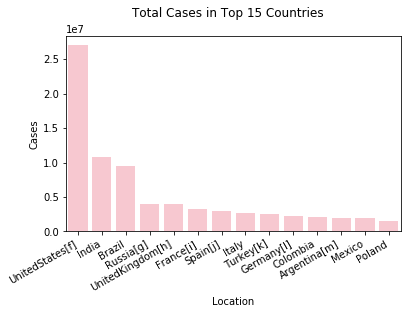

In [68]:
fig, ax = plt.subplots()
ax = sns.barplot(x=df_test['Location'], y=df_test['Cases'], color='pink')
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.suptitle('Total Cases in Top 15 Countries')

In [70]:
deaths = df[['Location', 'Deaths']].head(15)
df_deaths = deaths.iloc[1:]

Text(0.5, 0.98, 'Total Deaths in Top 15 Countries')

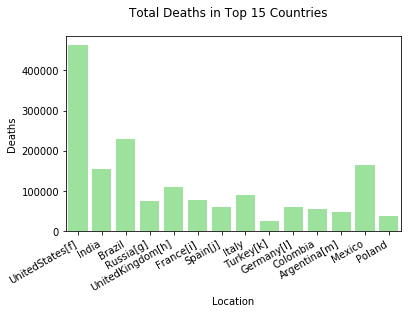

In [71]:
fig, ax = plt.subplots()
ax = sns.barplot(x=df_deaths['Location'], y=df_deaths['Deaths'], color='lightgreen')
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.suptitle('Total Deaths in Top 15 Countries')

In [72]:
small = df[['Location', 'Percent Death Rate']].head(15)

Text(0.5, 0.98, 'Death Rate in Top 15 Countries')

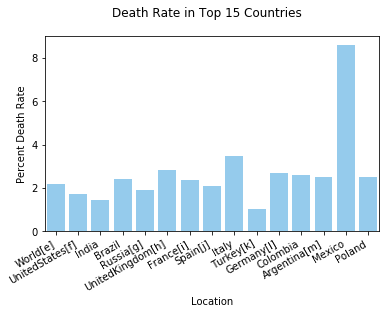

In [73]:
fig, ax = plt.subplots()
ax = sns.barplot(x=small['Location'], y=small['Percent Death Rate'], color='lightskyblue')
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.suptitle('Death Rate in Top 15 Countries')

Text(0.5, 0.98, 'KDE Distribution of Deaths by Location')

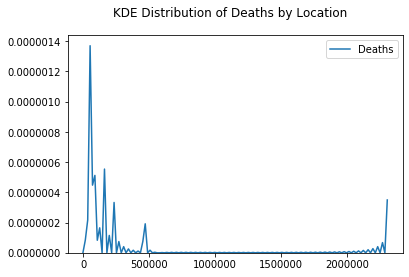

In [75]:
sns.kdeplot(df['Deaths'])
plt.suptitle('KDE Distribution of Deaths by Location')